In [26]:
%pip install -e .


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Obtaining file:///home/772a0560-9cb7-4270-b879-16761470b567/quantum_gate_package
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quantum-gate-package (pyproject.toml) ... done
  Created wheel for quantum-gate-package: filename=quantum_gate_package-0.1.0-0.editable-py3-none-any.whl size=2713 sha256=ceec29d7373b1d78d3704e786900abde7f300b71748c2c01e88a3f8d37f1549e
  Stored in directory: /tmp/pip-ephem-wheel-cache-q6k1qu6q/wheels/2f/05/c8/eb879c95f0dee4bf1653487281366d62e91084078e3a2ab57e
Successfully built quantum-gate-package
  Attempting uninstall: quantum-gate-package
    Found existing installation: quantum-gate-package 0.1.0
    Uninstalling quantum-gate-package-0.1.0:
      Successfully

Quantum Gates and Bell State preparations

Quantum gates are the fundamental building blocks of quantum circuits. They manipulate the state of qubits, enabling quantum computations and algorithms. Quantum gates are unitary operations, which means they preserve the total probability (the qubit remains in a valid quantum state).

Defining the gates

Define the Pauli gates, and the Hadamard, S and T gates and the identity "gate" (will be useful later) as 2x2 matrices. We recommend to use numpy arrays.
Define a function that builds a rotation gate rotation(ax, theta) for arbitrary rotation axis ax and angle theta. The function should return the rotation operator as a 2x2 matrix (numpy array). You may find the scipy function expm() useful for this. Test your implementation on some cases where you know what should come out (which one should generally do for every line of code one writes ;-).

In [2]:
from quantum_gate_package import I, X,P0, P1, H, Z,Y,S,T,rotation_gate,CNOT

In [29]:
import numpy as np


Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= X @ Psi0
Psi1_after = X @ Psi1

print(Psi0_after)
print(Psi1_after)

[1.+0.j 0.+0.j]
[0.70710678+0.j 0.70710678+0.j]


The Pauli-X (bit-flip) gate was applied to a ∣0⟩ initially prepared in the state ∣1⟩ and unchanged the superposition state ∣+⟩

In [30]:
import numpy as np

Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= Y @ Psi0
Psi1_after = Y @ Psi1

print(Psi0_after)
print(Psi1_after)

[0.-1.j 0.+0.j]
[0.-0.70710678j 0.+0.70710678j]


he Pauli-Y gate was applied to an initial state ∣1⟩. The resulting state was −i∣0⟩, confirming the expected bit-flip with a phase shift.

Pauli-Y gate was applied to an initial state ∣+⟩.The resulting state was −i∣-⟩, confirming the expected phase-flip with a phase shift.

In [31]:
import numpy as np

Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= Z @ Psi0
Psi1_after = Z @ Psi1

print(Psi0_after)
print(Psi1_after)

[ 0 -1]
[ 0.70710678 -0.70710678]


The Pauli-Z gate was applied to a qubit initially prepared in the state ∣1⟩. The resulting state was −∣1⟩ and state ∣+⟩ to ∣-⟩.

In [32]:
import numpy as np

Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= H @ Psi0
Psi1_after = H @ Psi1

print(Psi0_after)
print(Psi1_after)

[ 0.70710678+0.j -0.70710678+0.j]
[1.+0.j 0.+0.j]


The Hadamard gate was applied to the qubit initially in the state ∣1⟩ to ∣-⟩ and the ∣+⟩ to ∣0⟩

In [33]:
import numpy as np

Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= S @ Psi0
Psi1_after = S @ Psi1

print(Psi0_after)
print(Psi1_after)

[0.+0.j 0.+1.j]
[0.70710678+0.j         0.        +0.70710678j]


The S gate was applied to a qubit initially in the state ∣1⟩. The resulting state was i∣1⟩ 

In [34]:
import numpy as np

Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= T @ Psi0
Psi1_after = T @ Psi1

print(Psi0_after)
print(Psi1_after)

[0.        +0.j         0.70710678+0.70710678j]
[0.70710678+0.j  0.5       +0.5j]


The T gate is a phase gate that rotates by 45° around the Z axis. This phase shift is crucial for quantum interference and algorithm design, even though it does not affect measurement probabilities directly.

In [35]:
import numpy as np


theta = np.pi / 3
axis = [1, 1,1] 

R = rotation_gate(theta, axis)
Psi0 = np.array([0,1])                   
Psi1= 1/np.sqrt(2) * np.array([1,1])   
Psi0_after= R @ Psi0
Psi1_after = R @ Psi1

print(Psi0_after)
print(Psi1_after)

[-0.5      -0.5j  0.8660254+0.5j]
[0.25881905-0.70710678j 0.96592583+0.j        ]


In [ ]:
General Rotational Gates in Quantum Computing

[1 0]
[0.+0.j 1.+0.j]


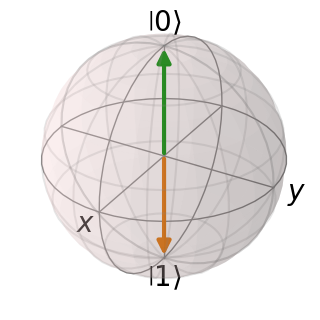

In [3]:
import qutip as qt
import numpy as np


initial_state = np.array((1,0))
final_state = X @ initial_state

print(initial_state)
print(final_state )

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()

In [ ]:
import qutip as qt
import numpy as np


initial_state=np.array([0,1])
final_state=Y@initial_state

print(initial_state)
print(final_state )

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()

[0 1]
[ 0 -1]


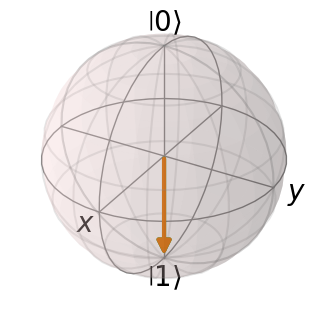

In [5]:
import qutip as qt
import numpy as np


initial_state = np.array([0,1])
final_state = Z @ initial_state

print(initial_state)
print(final_state)

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()


[0 1]
[ 0.70710678+0.j -0.70710678+0.j]


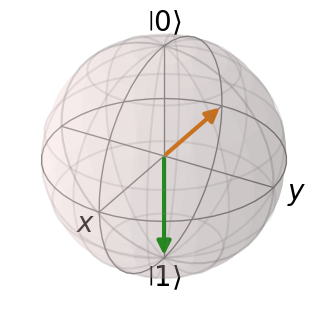

In [6]:
import qutip as qt
import numpy as np


initial_state = np.array((0,1))
final_state = H @ initial_state

print(initial_state)
print(final_state)

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()

[0 1]
[0.+0.j 0.+1.j]


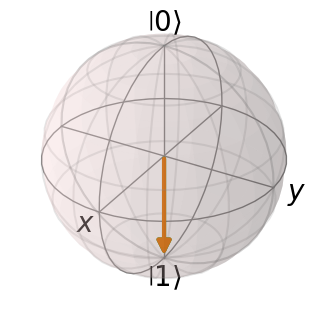

In [7]:
import qutip as qt
import numpy as np


initial_state = np.array((0,1))
final_state = S @ initial_state

print(initial_state )
print(final_state)

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()

[0 1]
[0.        +0.j         0.70710678+0.70710678j]


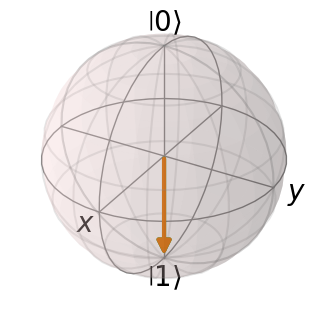

In [8]:
import qutip
import numpy as np


initial_state = np.array((0,1))
final_state = T @ initial_state

print(initial_state)
print(final_state)

b = qt.Bloch(figsize=(3, 3))

B_initial_state = qt.Qobj(initial_state)
B_final_state = qt.Qobj(final_state)

b.add_states([B_initial_state, B_final_state])
b.show()

(b) Visualization on the Bloch sphere
if we parameterize a state as 
, where 
 and 
 are the azimuthal and polar angle defining a point on the surface of the unit sphere in 3D, then the cartesian coordinates of that point correspond to the expectation values of the three Pauli operators.

We now want to visualize single-qubit states and explore the action of different gates in this way. For this, the QuTiP librabry provides the function Bloch(). QuTiP is a very powerful module for numerical simulation of quantum problems (install and explore qutip it you haven't done so yet!).

Use the code below, where a single spin is represented on the Bloch sphere, to familiarize yourself with the Bloch class. (This will only work if the function rotation() is defined and behaves as described in problem 1a). Make sure you understand what the @ operator does (dot-product, only available in python 3).

[0 1]
[0.        -0.70710678j 0.70710678+0.70710678j]


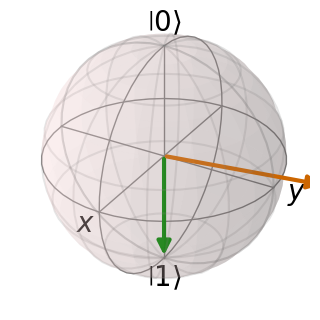

In [9]:
import qutip as qt
import numpy as np


theta = np.pi/2
n = (1, 0, 1)

R = rotation_gate(theta, n)

initial_state = np.array([0, 1])
final_state = R @ initial_state

print(initial_state)
print(final_state)

B_initial_state = qt.Qobj(initial_state)
B_final_state   = qt.Qobj(final_state)

b = qt.Bloch(figsize=(3, 3))
b.add_states([B_initial_state, B_final_state])
b.show()


Now iteratively apply the gate THTH to convince yourself that it indeed is a rotation about an axis $\mathbf{n}^*=(\cos(\pi/8),\sin(\pi/8),\cos(\pi/8))$ (unnormalized), as you have shown on problem set 1 and that the rotation angles densely cover the full circle upon interative application. For this, generate a plot that contains all the states generated from $|0\rangle$ upon apply the gate 100 times.

Optional:

The action of gates can also be visualized by letting it act on a representative ensemble of states and collectively examine its effect on them. Generate a set of sample states, e.g. regularly spaced points on the unit circle in the x-z-plane and apply some of the gates we got to know on Problem Set 1 (H, T, HTH, THTH...) to all of these states. Plot all the points before and after applying the gates jointly on the Bloch sphere to see that what is happening is indeed a rotation about a certain axis. Note: the function add_points() of the Bloch class also accepts a list of points. Other potentially useful numpy functions are linspace() and append().

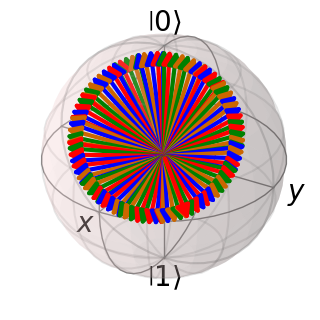

In [12]:
import qutip as qt
import numpy as np

U = T @ H @ T @ H
initial_state = np.array([1,0])
final_states = [qt.Qobj(initial_state)]

for _ in range(100):
    initial_state = U @ initial_state
    final_states.append(qt.Qobj(initial_state))

b = qt.Bloch(figsize=(3,3))
b.add_states(final_states)
b.show()

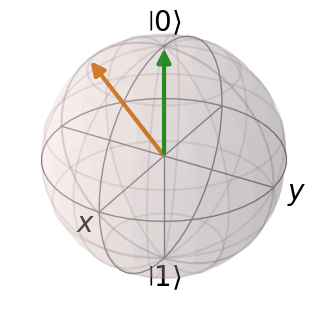

In [13]:
import qutip as qt
import numpy as np

U = H @ T @ H     
initial_state = np.array([1,0])
final_state = U @ initial_state

B_initial_state = qt.Qobj(initial_state)
B_final_state   = qt.Qobj(final_state)

b = qt.Bloch(figsize=(3,3))
b.add_states([B_initial_state, B_final_state])
b.show()

Multi-qubit gates and Bell_state

Consider a register of two qubits, which take the role of control and target. Show that the CNOT gate can be written as $CNOT = P_0\otimes I + P_1 \otimes X$, where $P_k=|k\rangle\langle k|$ is the projector on the single qubit state $|k\rangle$ and $\otimes$ denotes the tensor product, or Kronecker product (compute the matrix representation of CNOT from this expression).
This way of writing the CNOT gate is instructive as it explicitly distinguishes between the two states of the control qubit. The projectors onto the control qubit states can be read as: If the control qubit is in state $|0\rangle$, do nothing to the taget qubit (apply the identity). If the control qubit is in state $|1\rangle$, flip the taget qubit (apply the X gate). This formulation will also be helpful when we generalize to n-qubit registers. It allows us to implement any controlled unitary gate straight forwardly.

As a first application, we want to execute a quantum circuit that prepares the Bell state $(|00\rangle+|11\rangle)/\sqrt{2}$ (discussed in the lecture):
Initialize the register in state $|00\rangle$, apply a H gate to the first qubit, apply a CNOT gate. Verify by hand that this prepares a Bell state. Implement the preparation numerically: Sequentially apply the gates to the state using the `@` operator. Use the numpy function `kron()` to implement a Hadamard gate on the first qubit (i.e. build the matrix representation of the operator $H\otimes I$) and the CNOT gate (as done above) in this register.

In [28]:
import numpy as np

initial_state = np.array([1, 0, 
                          0, 0])
state_after_H = np.kron(H, I) @ initial_state

Phi_Pluse=CNOT@state_after_H
print(Phi_Pluse)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Φ⁺ (Phi Plus) has state vector components are 0.7071 for ∣00⟩ and ∣11⟩ and 0 for both ∣01⟩ and ∣10⟩.


In [16]:
import numpy as np

initial_state = np.array((1,0,0,0))
state_after_H= np.kron(H,I) @ initial_state
state_after_CNOT= CNOT @ state_after_H

Phi_Minus = np.kron(Z,I) @ state_after_CNOT

print(Phi_Minus) 

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


Φ⁻ has state vector components are 0.7071 for ∣00⟩, -0.7071 for ∣11⟩, and 0 for both ∣01⟩ and ∣10⟩.

In [17]:
import numpy as np


initial_state = np.array((1,0,0,0))
state_after_H= np.kron(H,I) @ initial_state
state_after_CNOT= CNOT @ state_after_H

Psi_Plus = np.kron(X,I) @ state_after_CNOT

print(Psi_Plus)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


Ψ⁺ (Psi Plus) has state vector components are 0.7071 for ∣01⟩ and ∣10⟩, and 0 for both ∣00⟩ and ∣11⟩.

In [18]:
import numpy as np

initial_state = np.array((1,0,0,0))
state_after_H= np.kron(H,I) @ initial_state
state_after_CNOT= CNOT @ state_after_H
state_after_X = np.kron(X,I) @ state_after_CNOT

Psi_Minus = np.kron(Z,I) @ state_after_X
print(Psi_Minus)

[ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


Ψ⁻ (Psi Minus) has state vector components are 0.7071 for ∣01⟩, -0.7071 for ∣10⟩, and 0 for both ∣00⟩ and ∣11⟩.

In [19]:
import numpy as np 

initial_state = np.array((1,0,0,0,
                          0,0,0,0))
H_q0 = np.kron(H, np.kron(I, I))
state_after_H =  H_q0@ initial_state

CNOT_q0_q2 = np.kron(P0, np.kron(I, I)) + np.kron(P1, np.kron(I, X))
state_after_CNOT_q0_q2 = CNOT_q0_q2 @ state_after_H

CNOT_q0_q1 = np.kron(P0, np.kron(I, I)) + np.kron(P1, np.kron(X, I))
state_after_q0_q1 = CNOT_q0_q1 @ state_after_CNOT_q0_q2


CNOT_q1_q0 = np.kron(np.kron(I, P0), I) + np.kron(np.kron(I, P1),X )
state_after_CNOT_q1_q0 = CNOT_q1_q0 @ state_after_q0_q1

print(state_after_CNOT_q1_q0)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


In [20]:
import numpy as np


CX_C_T = (np.kron(H,H)) @ (np.kron(P0, I)) @ (np.kron(H,H))+(np.kron(H,H)) @ (np.kron(P1, X)) @ (np.kron(H,H))

print("CX_C_T=")
print(CX_C_T)

CX_T_C=np.kron(P0,X) + np.kron(P1,I)

print("CX__T_C=")
print(CX_T_C)  

CX_C_T=
[[ 1.00000000e+00+0.j -2.46519033e-32+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.46519033e-32+0.j
   1.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  1.00000000e+00+0.j
  -2.46519033e-32+0.j]
 [-2.46519033e-32+0.j  1.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]]
CX__T_C=
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [21]:
import numpy as np

Z=np.array([[1,0],[0,-1]])
CZ_o=np.kron(P0,I)+np.kron(P1,Z)
print("CZ_O")
print(CZ_o)

CZ_E=(np.kron(I,H))@(np.kron(P0,I)+np.kron(P1,X))@(np.kron(I,H))
print("CZ_E")
print(CZ_E)

CZ_O
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
CZ_E
[[ 1.00000000e+00+0.j -2.23711432e-17+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [-2.23711432e-17+0.j  1.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  1.00000000e+00+0.j
  -2.23711432e-17+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.23711432e-17+0.j
  -1.00000000e+00+0.j]]


In [22]:
import numpy as np


S01 = P0 @ X @ P1   
S10 = P1 @ X @ P0   

SWAP = (np.kron(P0, P0) +
        np.kron(P1, P1) +
        np.kron(S01, S10) +
        np.kron(S10, S01))

print(SWAP)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [23]:
import numpy as np

CC_X=np.kron(P0,np.kron(I,I))+np.kron(P1,np.kron(P0,I))+np.kron(P1,np.kron(P1,X))
print(CC_X)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [24]:
import numpy as np

theta = np.pi/2
n = (0, 1,0) 

R = rotation_gate(theta, n)
CC_R=np.kron(P0,np.kron(I,I))+np.kron(P1,np.kron(P0,I))+np.kron(P1,np.kron(P1,R))
print(CC_R)

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  1.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   

In [25]:
import numpy as np

C_Z=np.kron(P0,I)+np.kron(P1,Z)
print(C_Z)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
